In [93]:
import re
import matplotlib.pyplot as plt

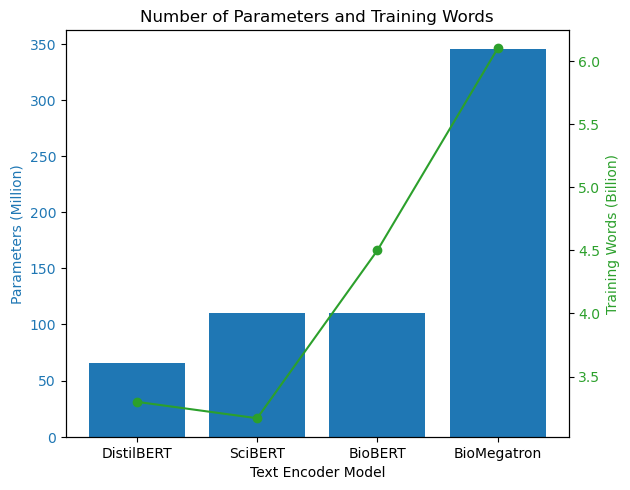

In [94]:
models = ['DistilBERT', 'SciBERT', 'BioBERT', 'BioMegatron']
parameters = [66, 110, 110, 345]
training_words = [3.3, 3.17, 4.5, 6.1]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Text Encoder Model')
ax1.set_ylabel('Parameters (Million)', color=color)
ax1.bar(models, parameters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Training Words (Billion)', color=color)
ax2.plot(models, training_words, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Number of Parameters and Training Words')
plt.show()

In [95]:
def parse_log_file(file_path, start_epoch=1):
    epoch_loss_dict = {}
    
    with open(file_path, 'r') as file:
        for line in file:
            match = re.match(r'Epoch (\d+) done\.  Validation Loss:  (\d+\.\d+)', line)
            if match:
                epoch = int(match.group(1))
                validation_loss = float(match.group(2))
                if epoch >= start_epoch:
                    epoch_loss_dict[epoch] = validation_loss
    
    return epoch_loss_dict

In [96]:
def plot_loss_evolution(epoch_loss_dict, label):
    epochs = list(epoch_loss_dict.keys())
    losses = list(epoch_loss_dict.values())
    plt.plot(epochs, losses, label=label)

In [97]:
GAT = parse_log_file('../logs/GAT_110epochs.log')
GATv2 = parse_log_file('../logs/GATv2_120epochs.log')
SuperGAT = parse_log_file('../logs/SuperGAT_160epochs.log')
len(GAT), len(GATv2), len(SuperGAT)

(110, 120, 160)

In [98]:
min(GAT.values()), min(GATv2.values()), min(SuperGAT.values())

(0.04442127096053982, 0.06347346787508766, 0.06599103248517396)

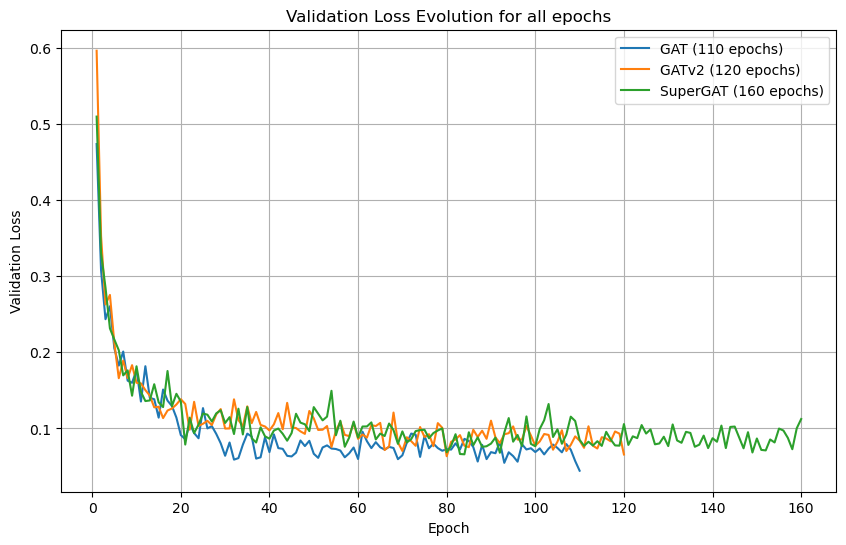

In [99]:
plt.figure(figsize=(10, 6))

plot_loss_evolution(GAT, 'GAT (110 epochs)')
plot_loss_evolution(GATv2, 'GATv2 (120 epochs)')
plot_loss_evolution(SuperGAT, 'SuperGAT (160 epochs)')

plt.title('Validation Loss Evolution for all epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [100]:
GAT = parse_log_file('../logs/GAT_110epochs.log', start_epoch=20)
GATv2 = parse_log_file('../logs/GATv2_120epochs.log', start_epoch=20)
SuperGAT = parse_log_file('../logs/SuperGAT_160epochs.log', start_epoch=20)
len(GAT), len(GATv2), len(SuperGAT)

(91, 101, 141)

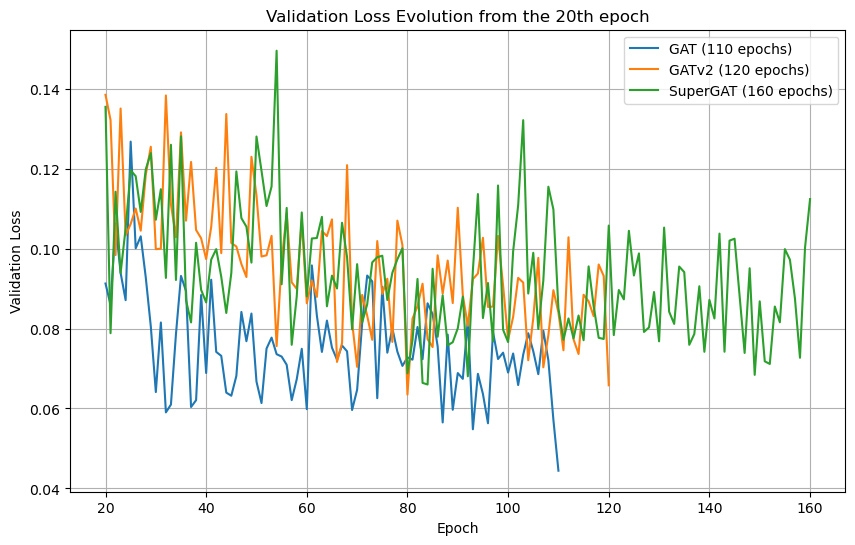

In [101]:
plt.figure(figsize=(10, 6))

plot_loss_evolution(GAT, 'GAT (110 epochs)')
plot_loss_evolution(GATv2, 'GATv2 (120 epochs)')
plot_loss_evolution(SuperGAT, 'SuperGAT (160 epochs)')

plt.title('Validation Loss Evolution from the 20th epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()